In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.3.0'

In [2]:
keras.__version__


'2.4.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [4]:
X_train_full.shape


(60000, 28, 28)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0


In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [7]:
class_names[y_train[0]]


'Coat'

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
hidden1 = model.layers[1]
hidden1.name
#model.get_layer('dense') is hidden1



'dense'

In [12]:
weights, biases = hidden1.get_weights()
weights




array([[ 0.06723402,  0.02068007,  0.00540637, ...,  0.05706787,
         0.072402  ,  0.03979152],
       [-0.02891603, -0.06046904,  0.02355115, ..., -0.04874341,
         0.05141643, -0.03178157],
       [ 0.03192157, -0.0397619 ,  0.05322208, ...,  0.03919571,
         0.04202087,  0.03329989],
       ...,
       [ 0.0518306 ,  0.00760338, -0.04514882, ...,  0.05638914,
        -0.06063217, -0.00358253],
       [-0.05737655, -0.03548316,  0.04995134, ...,  0.0343206 ,
        -0.02583133, -0.05153334],
       [ 0.03324744,  0.04855876, -0.03361472, ..., -0.0076865 ,
        -0.04643286,  0.00794762]], dtype=float32)

In [13]:
print(weights.shape)

print(biases)

print(biases.shape)


(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(300,)


In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [15]:
print(X_train)
print(y_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[4 0 7 ...

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))



Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7198 - accuracy: 0.7663 - val_loss: 0.5773 - val_accuracy: 0.7864
Epoch 2/30
1719/1719 [==============================] - 1s 854us/step - loss: 0.4892 - accuracy: 0.8295 - val_loss: 0.4392 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 1s 834us/step - loss: 0.4459 - accuracy: 0.8449 - val_loss: 0.4300 - val_accuracy: 0.8526
Epoch 4/30
1719/1719 [==============================] - 1s 842us/step - loss: 0.4181 - accuracy: 0.8541 - val_loss: 0.4192 - val_accuracy: 0.8532
Epoch 5/30
1719/1719 [==============================] - 1s 828us/step - loss: 0.3981 - accuracy: 0.8602 - val_loss: 0.4425 - val_accuracy: 0.8432
Epoch 6/30
1719/1719 [==============================] - 1s 869us/step - loss: 0.3821 - accuracy: 0.8669 - val_loss: 0.4011 - val_accuracy: 0.8548
Epoch 7/30
1719/1719 [==============================] - 1s 833us/step - loss: 0.3686 - accuracy: 0.8696 - val_loss: 0.3941 - v

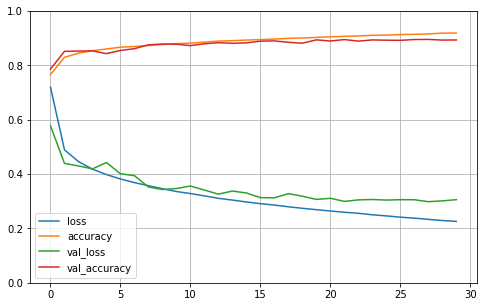

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [18]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 0s 549us/step - loss: 0.3374 - accuracy: 0.8812


[0.3374340236186981, 0.8812000155448914]

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [20]:
y_pred = model.predict_classes(X_new)
y_pred


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [21]:
import numpy as np
np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [22]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)